# ARKit to Apple Face in Maya

In [ ]:
import json
data_path = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\data\nicole_long_neutral.csv"

def load_apple_motion(motion_data_path = "", recordingfps=30, calibration_data_path=""):
    name_to_mesh = {"eyesquintright": "Mesh31", "eyelookupright": "Mesh33", "jawright": "Mesh25", "mouthstretchright": "Mesh4", "browdownleft": "Mesh50", "browdownleft\n": "Mesh50", "cheekpuff": "Mesh45", "mouthsmileleft": "Mesh5", "jawopen": "Mesh26", "mouthshrugupper": "Mesh8", "mouthleft": "Mesh18", "mouthsmileright": "Mesh7", "jawforward": "Mesh28", "mouthrollupper": "Mesh10", "mouthlowerdownright": "Mesh16", "browouterupright": "Mesh46", "mouthdimpleright": "Mesh22", "eyelookdownleft": "Mesh40", "eyewideleft": "Mesh30", "mouthshruglower": "Mesh9", "mouthpressright": "Mesh14", "mouthrolllower": "Mesh11", "jawleft": "Mesh27", "cheeksquintright": "Mesh43", "mouthpucker": "Mesh13", "mouthdimpleleft": "Mesh23", "mouthupperupleft": "Mesh2", "eyelookdownright": "Mesh39", "nosesneerright": "Mesh", "nosesneerright\n": "Mesh", "eyelookoutleft": "Mesh36", "eyewideright": "Mesh29", "browinnerup": "Mesh48", "cheeksquintleft": "Mesh44", "eyelookupleft": "Mesh34", "mouthlowerdownleft": "Mesh17", "browouterupleft": "Mesh47", "eyelookinleft": "Mesh38", "eyelookinright": "Mesh37", "mouthright": "Mesh12", "mouthstretchleft": "Mesh6", "mouthpressleft": "Mesh15", "nosesneerleft": "Mesh1", "mouthupperupright": "Mesh3", "mouthclose": "Mesh24", "eyelookoutright": "Mesh35", "browdownright\n": "Mesh49", "browdownright": "Mesh49", "eyeblinkleft": "Mesh42", "mouthfrownleft": "Mesh21", "mouthfrownright": "Mesh20", "eyeblinkright": "Mesh41", "mouthfunnel": "Mesh19", "eyesquintleft": "Mesh32"}
    mesh_to_name = {"Mesh45": "cheekpuff", "Mesh44": "cheeksquintleft", "Mesh47": "browouterupleft", "Mesh46": "browouterupright", "Mesh41": "eyeblinkright", "Mesh40": "eyelookdownleft", "Mesh43": "cheeksquintright", "Mesh42": "eyeblinkleft", "Mesh49": "browdownright\n", "Mesh49": "browdownright", "Mesh48": "browinnerup", "Mesh34": "eyelookupleft", "Mesh35": "eyelookoutright", "Mesh36": "eyelookoutleft", "Mesh": "nosesneerright", "Mesh30": "eyewideleft", "Mesh31": "eyesquintright", "Mesh37": "eyelookinright", "Mesh33": "eyelookupright", "Mesh38": "eyelookinleft", "Mesh39": "eyelookdownright", "Mesh18": "mouthleft", "Mesh19": "mouthfunnel", "Mesh32": "eyesquintleft", "Mesh50": "browdownleft","Mesh50": "browdownleft\n", "Mesh12": "mouthright", "Mesh13": "mouthpucker", "Mesh10": "mouthrollupper", "Mesh11": "mouthrolllower", "Mesh16": "mouthlowerdownright", "Mesh17": "mouthlowerdownleft", "Mesh14": "mouthpressright", "Mesh15": "mouthpressleft", "Mesh1": "nosesneerleft", "Mesh2": "mouthupperupleft", "Mesh3": "mouthupperupright", "Mesh4": "mouthstretchright", "Mesh5": "mouthsmileleft", "Mesh6": "mouthstretchleft", "Mesh7": "mouthsmileright", "Mesh8": "mouthshrugupper", "Mesh9": "mouthshruglower", "Mesh23": "mouthdimpleleft", "Mesh22": "mouthdimpleright", "Mesh21": "mouthfrownleft", "Mesh20": "mouthfrownright", "Mesh27": "jawleft", "Mesh26": "jawopen", "Mesh25": "jawright", "Mesh24": "mouthclose", "Mesh29": "eyewideright", "Mesh28": "jawforward"}

    # load model
    # load data from file
    columns = []
    raw_cal_data = []
    cal_data = []
    times = []
    with open(calibration_data_path) as f:
        labels = f.readline()
        columns = labels.split(",")
        columns = columns[2:]
        raw_cal_data = f.readlines()
    for i in range(0, len(raw_cal_data)):
        frame_time = raw_cal_data[i].split(",")[0]
        frame_time_list = frame_time.split(":")
        frame_hour, frame_minute, frame_second, frame_frame = frame_time_list
        frame_hour = float(frame_hour)
        frame_minute = float(frame_minute)
        frame_second = float(frame_second)
        frame_frame = float(frame_frame)
        frame_time = frame_frame/recordingfps + frame_second + frame_minute * 60 + frame_hour * 3600
        frame_cal_data = raw_cal_data[i].split(",")
        # if len(frame_cal_data) > 20:
        times.append(frame_time)
        cal_data.append(frame_cal_data[2:])

    start_time = times[0]
    for i in range(0, len(times)):
        times[i] = times[i] - start_time
    for j in range(0, len(columns)):
        name = columns[j].lower()
        # try:
        weight_name = name_to_mesh[name]
        # except:
        #     if name[-2:] == "_l":
        #         name = name[:-2] + "left"
        #     else:
        #         name = name[:-2] + "right"
        #     weight_name = name_to_mesh[name]
        cmds.cutKey("blendShape1.{}".format(weight_name), s=True)
    cmds.cutKey("Neutral:Mesh.{}".format("rotateY"))
    cmds.cutKey("Neutral:Mesh.{}".format("rotateX"))
    cmds.cutKey("Neutral:Mesh.{}".format("rotateZ"))
    # compute curve using loaded data:
    for i in range(0, len(times)):
        for j in range(0, len(columns)):
            name = columns[j].lower()
            # try:
            weight_name = name_to_mesh[name]
            # except:
            #     if name[-2:] == "_l":
            #         name = name[:-2] + "left"
            #     else:
            #         name = name[:-2] + "right"
            #     weight_name = name_to_mesh[name]
            cmds.setKeyframe("blendShape1.{}".format(weight_name), v=float(cal_data[i][j]),
                                 t=times[i] * mel.eval('float $fps = `currentTimeUnitToFPS`'))
        # cmds.setKeyframe("Neutral:Mesh.{}".format("rotateY"), v=(float(cal_data[i][-9]))*-90,
        #              t=times[i] * mel.eval('float $fps = `currentTimeUnitToFPS`'))
        # cmds.setKeyframe("Neutral:Mesh.{}".format("rotateX"), v=(float(cal_data[i][-8]))*-70,
        #              t=times[i] * mel.eval('float $fps = `currentTimeUnitToFPS`'))
        # cmds.setKeyframe("Neutral:Mesh.{}".format("rotateZ"), v=(float(cal_data[i][-7]))*-45,
        #              t=times[i] * mel.eval('float $fps = `currentTimeUnitToFPS`'))


load_apple_motion(data_path, 60, data_path)

# ARKit to Jali ValleyGirl


In [ ]:
#https://melindaozel.com/sd/arkit-to-facs-cheat-sheet/
#https://melindaozel.com/facs-cheat-sheet/


In [ ]:
import json
data_path = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\data\p2_goodday_neutral_AMP_raw.csv"
def load_apple_motion(motion_data_path = "", recordingfps=30, calibration_data_path=""):

    name_to_mesh = {"eyesquintright": ["AU7 – lid tightener", "Mesh31", "Squint_R.Squint_R", 0, 8],
                 "eyesquintleft": ["AU7 – lid tightener", "Mesh32", "Squint_L.Squint_L", 0, 8],
                 "eyelookupright": ["M63 – eyes up", "Mesh33", "CNT_EYE_RIGHT.DownUp_eye_R", 0, 10],
                 "eyelookupleft": ["M63 – eyes up", "Mesh34", "CNT_EYE_LEFT.DownUp_eye_L", 0, 10],
                 "jawright": ["AD30 – jaw sideways", "Mesh25", "CNT_JAW.LeftRight_jaw", 0, 10],
                 "jawleft": ["AD30 – jaw sideways", "Mesh27", "CNT_JAW.LeftRight_jaw", 0, -10],
                 "mouthstretchright": ["AU20 – lip stretcher", "Mesh4", "Grimace_R.Grimace_R", 0, 10],
                 "mouthstretchleft": ["AU20 – lip stretcher", "Mesh6", "Grimace_L.Grimace_L", 0, 10],
                 "browdownright": ["AU4 – brow lowerer", "Mesh49", "BrowFurrow_R", 0, 4],
                 "browdownleft": ["AU4 – brow lowerer", "Mesh50", "BrowFurrow_L", 0, 4],
                 "browdownleft\n": ["AU4 – brow lowerer", "Mesh50", "BrowFurrow_L", 0, 4],
                 "cheekpuff": ["AD34 – puff", "Mesh45", "SuckBlow", 0, 10],
                 "mouthsmileright": ["AU12 – lip corner puller", "Mesh7", "Smile_R.Smile_R", 0, 10],
                 "mouthsmileleft": ["AU12 – lip corner puller", "Mesh5", "Smile_L.Smile_L", 0, 10],
                 "jawopen": ["AU26 – jaw drop or AU27 – mouth stretch", "Mesh26", "CNT_JAW.Open_jaw", 0, 10],
                 "jawforward": ["AD29 – jaw thrust", "Mesh28", "CNT_JAW.Thrust_jaw", 0, 10],
                 "mouthrollupper": ["AU28 – lips suck", "Mesh10", "UpLip_ctl.TightenFunnel_upLip", 0, -5],
                 "mouthrolllower": ["AU28 – lips suck", "Mesh11", "LoLip_ctl.TightenFunnel_loLip", 0, -5],
                 "mouthlowerdownright": ["AU16 – lower lip depressor", "Mesh16", "LoLip_R_ctl.DownUp_loLip_R", 0, -5],
                 "mouthlowerdownleft": ["AU16 – lower lip depressor", "Mesh17", "LoLip_L_ctl.DownUp_loLip_L", 0, -5],
                 "browouterupright": ["AU2 – outer brow raiser", "Mesh46", "OuterBrowRaise_R", 0, 8],
                 "browouterupleft": ["AU2 – outer brow raiser", "Mesh47", "OuterBrowRaise_L", 0, 8],
                 "mouthdimpleright": ["AU14 – dimpler", "Mesh22", "Dimple_R", 0, 10],
                 "mouthdimpleleft": ["AU14 – dimpler", "Mesh23", "Dimple_L", 0, 10],
                 "eyelookdownright": ["M64 – eyes down", "Mesh39", "CNT_EYE_RIGHT.DownUp_eye_R", 0, -10],
                 "eyelookdownleft": ["M64 – eyes down", "Mesh40", "CNT_EYE_LEFT.DownUp_eye_L", 0, -10],
                 "eyewideright": ["AU5 – upper lid raiser", "Mesh29", "blink_R", 0, -5],
                 "eyewideleft": ["AU5 – upper lid raiser", "Mesh30", "blink_L", 0, -5],
                 "cheeksquintright": ["AU6 – cheek raiser", "Mesh43", "CheekRaise_R", 0, 5],
                 "cheeksquintleft": ["AU6 – cheek raiser", "Mesh44", "CheekRaise_L", 0, 5],
                 "mouthpucker": ["AU18 – lip pucker", "Mesh13", "Pucker", 0, 10],
                 "mouthupperupright": ["AU10 – upper lip raiser", "Mesh2", "UpLip_R_ctl.DownUp_upLip_R", 0, -3], #??
                 "mouthupperupleft": ["AU10 – upper lip raiser", "Mesh3", "UpLip_L_ctl.DownUp_upLip_L", 0, -3],  #??
                 "nosesneerright\n": ["AU9 – nose wrinkler", "Mesh", "Wince_R", 0, 4],
                 "nosesneerright": ["AU9 – nose wrinkler", "Mesh", "Wince_R", 0, 4],
                 "nosesneerleft": ["AU9 – nose wrinkler", "Mesh1", "Wince_L", 0, 4],
                 "eyelookoutright": ["AU65 – walleye", "Mesh35", "CNT_EYE_RIGHT.LeftRight_eye_R", 0, -10],
                 "eyelookoutleft": ["AU65 – walleye", "Mesh36", "CNT_EYE_LEFT.LeftRight_eye_L", 0, 10],
                 "browinnerup": ["AU1 – inner brow raiser", "Mesh48", "InnerBrowRaise", 0, 10],
                 "eyelookinleft": ["AU66 – crosseye", "Mesh38", "CNT_EYE_RIGHT.LeftRight_eye_R", 0, 10],
                 "eyelookinright": ["AU66 – crosseye", "Mesh37", "CNT_EYE_LEFT.LeftRight_eye_L", 0, -10],
                 "eyeblinkright": ["AU45 – blink", "Mesh41", "blink_R", 0, 10],
                 "eyeblinkleft": ["AU45 – blink", "Mesh42", "blink_L", 0, 10],
                 "mouthfrownright": ["AU15 – lip corner depressor", "Mesh20", "Frown_R", 0, 8],
                 "mouthfrownleft": ["AU15 – lip corner depressor", "Mesh21", "Frown_L", 0, 8],
                 "mouthfunnel": ["AU22 – lip funneler", "Mesh19", "MouthCTL.TightenFunnel", 0, 8],
                #  "mouthpressright": ["AU24 – lip presser", "Mesh14"],
                #  "mouthpressleft": ["AU24 – lip presser", "Mesh15"],
                #  "mouthclose": ["N/A", "Mesh24"],
                #  "mouthshrugupper": ["N/A", "Mesh8"],
                #  "mouthshruglower": ["N/A", "Mesh9"],
                #  "mouthright": ["N/A", "Mesh12"],
                #  "mouthleft": ["N/A", "Mesh18"],
                #  "tongueout", head roll, eye pitch...
                 }

    # load data from file
    columns = []
    raw_cal_data = []
    cal_data = []
    times = []
    with open(calibration_data_path) as f:
        labels = f.readline()
        columns = labels.split(",")
        columns = columns[2:]
        raw_cal_data = f.readlines()

    for i in range(0, len(raw_cal_data)):
        frame_time = raw_cal_data[i].split(",")[0]
        frame_time_list = frame_time.split(":")
        frame_hour, frame_minute, frame_second, frame_frame = frame_time_list
        frame_hour = float(frame_hour)
        frame_minute = float(frame_minute)
        frame_second = float(frame_second)
        frame_frame = float(frame_frame)
        frame_time = frame_frame/recordingfps + frame_second + frame_minute * 60 + frame_hour * 3600
        frame_cal_data = raw_cal_data[i].split(",")

        # if len(frame_cal_data) > 20:
        times.append(frame_time)
        cal_data.append(frame_cal_data[2:])

    start_time = times[0]

    for i in range(0, len(times)):
        times[i] = times[i] - start_time
    for j in range(0, len(columns)): #-10
        name = columns[j].lower()
        weight_name = name_to_mesh[name][2]
        cmds.cutKey(weight_name, s=True)

    # compute curve using loaded data:
    for i in range(0, len(times)):
        for j in range(0, len(columns)):
            name = columns[j].lower()
            weight_name = name_to_mesh[name][2]
            cmds.setKeyframe(weight_name, v=float(cal_data[i][j])*(name_to_mesh[name][4]-name_to_mesh[name][3]),
                                 t=times[i] * mel.eval('float $fps = `currentTimeUnitToFPS`'))


load_apple_motion(data_path, 60, data_path)

# Moving Average CSV

In [ ]:
import csv
import pandas as pd
import numpy as np

In [ ]:
# Open original CSV
# IMPORT the CSV file to the Colab first
filepath = r"MySlate_9_iPhone.csv"
df = pd.read_csv(filepath)

# Filter data
window = 90
col_names = list(df.columns)
for i in range(1, len(col_names)):
  c = col_names[i]
  df[c] = df[c].rolling(window).mean()

df.dropna(inplace=True)

# Save filtered CSV and DOWNLOAD it
save_file = 'filtered{}_'.format(window) + filepath
df.to_csv(save_file, index=False)

# Maya save animation as video

In [ ]:
import pymel.core as pm
import maya.mel as mel

def save_animation_to_video(output_file, width=1920, height=1080, start_frame=1, end_frame=100, frame_padding=4):
    # Set the playback range
    pm.playbackOptions(minTime=start_frame, maxTime=end_frame)

    # Create a camera
    camera = pm.camera(name='render_camera')[0]
    pm.lookThru(camera)

    # Set resolution
    pm.setAttr('defaultResolution.width', width)
    pm.setAttr('defaultResolution.height', height)

    # Set file output format
    file_format = 'avi'  # Change this to the desired output format (avi, mov, etc.)
    pm.setAttr('defaultRenderGlobals.imageFormat', 20)  # 20 corresponds to AVI format

    # Set output file path
    pm.setAttr('defaultRenderGlobals.imageFilePrefix', output_file)

    # Set frame range
    pm.setAttr('defaultRenderGlobals.startFrame', start_frame)
    pm.setAttr('defaultRenderGlobals.endFrame', end_frame)

    pm.setAttr('defaultRenderGlobals.imageFormat', 8)

    # Set frame padding
    pm.setAttr('defaultRenderGlobals.extensionPadding', frame_padding)

    # Render the animation
    mel.eval('render -x {} -y {} -b {} -e {} -cam {} -im {} -r "defaultRenderGlobals"'.format(
        width, height, start_frame, end_frame, camera, output_file))

    print("Animation rendered successfully.")

# Example usage
filepath = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\data\chatgpt_animation"
save_animation_to_video(output_file, width=1920, height=1080, start_frame=1, end_frame=100, frame_padding=4)

In [ ]:
import pymel.core as pm

def save_animation_to_video(output_file, width=1920, height=1080, start_frame=1, end_frame=100, frame_padding=4):
    # Set the playback range
    pm.playbackOptions(minTime=start_frame, maxTime=end_frame)

    # Create a camera
    camera = pm.camera(name='render_camera')[0]
    pm.lookThru(camera)

    # Set resolution
    pm.setAttr('defaultResolution.width', width)
    pm.setAttr('defaultResolution.height', height)

    # Set file output format
    file_format = 'mov'  # Change this to the desired output format (mov, avi, etc.)
    pm.setAttr('defaultRenderGlobals.imageFormat', 8)  # 8 corresponds to MOV format

    # Set output file path (enclose in double quotes to handle spaces)
    pm.setAttr('defaultRenderGlobals.imageFilePrefix', output_file)

    # Set frame range
    pm.setAttr('defaultRenderGlobals.startFrame', start_frame)
    pm.setAttr('defaultRenderGlobals.endFrame', end_frame)

    # Set frame padding
    pm.setAttr('defaultRenderGlobals.extensionPadding', frame_padding)

    # Render the animation
    pm.render(animation=True, writeImage=True, sequence=True, camera=camera)

    print("Animation rendered successfully.")

# Example usage
output_file = 'C:/Users/jessi/Documents/Toronto PhD/Courses/CSC2521H Face Modelling/Amplify Emotion Project/data/sample_video'
save_animation_to_video(output_file, width=1920, height=1080, start_frame=1, end_frame=100, frame_padding=4)

In [ ]:
import json
import numpy as np
import os
import sys
import open3d as o3d
import time
import moviepy.video.io.ImageSequenceClip
import copy
import math
class CatmullRomSplineInterpolation:
    # this class is limited to only be able to fit coninious curves (for example the discontinious)
    # jk i was wrong I'm dumb lol
    def __init__(self, x, y, tao=0.5):
        x = np.array(x)
        y = np.array(y)
        self.kind = "catmull rom"
        self.x = np.zeros([x.shape[0] + 2, ])
        self.x[1:-1] = x
        self.x[0] = x[0]
        self.x[-1] = x[-1]
        self.y = np.zeros([y.shape[0] + 2, ])
        self.y[1:-1] = y
        self.y[0] = y[0]
        self.y[-1] = y[-1]
        self.tension_mat = [[0, 1, 0, 0],
                            [-tao, 0, tao, 0],
                            [2 * tao, tao - 3, 3 - 2 * tao, -tao],
                            [-tao, 2 - tao, tao - 2, tao]]
        self.tension_mat = np.array(self.tension_mat)
        return
    def binary_search(self, t):
        if t <= self.x[0]:
            return 0
        elif t > self.x[-1]:
            return self.x.shape[0]-1
        # find it
        left, right = 0, self.x.shape[0] - 1
        index = -1

        while left <= right:
            mid = (left + right) // 2

            if self.x[mid] < t:
                index = mid
                left = mid + 1
            else:
                right = mid - 1
        return index
    def eval_single(self, x):
        # here we ensure that we will never get to the end of the curve
        if x <= self.x[1]:
            return self.y[0]
        elif x >= self.x[-2]:
            return self.y[-1]
        i = self.binary_search(x)
        p0 = self.y[i-1]
        p1 = self.y[i]
        p2 = self.y[i+1]
        p3 = self.y[i+2]
        t0 = self.x[i]
        t1 = self.x[i+1]
        u = (x - t0) / (t1 - t0)
        u_vec = np.array([1, u, u**2, u**3])
        p_vec = np.array([p0, p1, p2, p3])

        val = u_vec.dot(self.tension_mat @ p_vec)
        return val
    def eval(self, ts):
        out = np.zeros(ts.shape)
        for i in range(0, ts.shape[0]):
            out[i] = self.eval_single(ts[i])
        return out
class CubicSplineInterpolation:
    # this class is limited to only be able to fit coninious curves (for example the discontinious)
    # jk i was wrong I'm dumb lol
    def __init__(self, x, y):
        self.kind = "cubic spline"
        self.control_points: np.array = None # in the shape of [T, 2]
        self.x = x
        self.y = y
        # find all the k by solving Ak = b
        A = np.zeros([self.x.shape[0], self.x.shape[0]])
        b = np.zeros(self.x.shape)
        # find A
        for i in range(1, self.x.shape[0]-1):
            A[i, i-1] = 1.0 / (self.x[i] - self.x[i-1])
            A[i, i] = 2 * (1.0 / (self.x[i] - self.x[i-1]) + 1.0 / (self.x[i+1] - self.x[i]))
            A[i, i+1] = 1.0 / (self.x[i+1] - self.x[i])
            b[i] = 3 * ((self.y[i] - self.y[i-1])/(self.x[i] - self.x[i-1])**2 + (self.y[i+1] - self.y[i])/(self.x[i+1] - self.x[i])**2)
        A[0, 0] = 2 / (self.x[1] - self.x[0])
        A[0, 1] = 1 / (self.x[1] - self.x[0])
        A[-1, -2] = 1 / (self.x[-1] - self.x[-2])
        A[-1, -1] = 2 / (self.x[-1] - self.x[-2])
        # find b
        b[0] = 3 * ((self.y[1]-self.y[0])/(self.x[1]-self.x[0])**2)
        b[-1] = 3 * ((self.y[-1]-self.y[-2])/(self.x[-1]-self.x[-2])**2)
        # solve for k
        self.k = np.linalg.solve(A, b)
        return
    def binary_search(self, t):
        if t <= self.x[0]:
            return 0
        elif t > self.x[-1]:
            return self.x.shape[0]-1
        # find it
        left, right = 0, self.x.shape[0] - 1
        index = -1

        while left <= right:
            mid = (left + right) // 2

            if self.x[mid] < t:
                index = mid
                left = mid + 1
            else:
                right = mid - 1
        return index
    def eval_single(self, x):
        if x <= self.x[0]:
            return self.y[0]
        elif x >= self.x[-1]:
            return self.y[-1]
        i = self.binary_search(x)
        x1 = self.x[i]
        x2 = self.x[i+1]
        y1 = self.y[i]
        y2 = self.y[i+1]
        k1 = self.k[i]
        k2 = self.k[i+1]
        t = (x - x1) / (x2 - x1)
        a = k1 * (x2 - x1) - (y2 - y1)
        b = -k2 * (x2 - x1) + (y2 - y1)
        y = (1 - t) * y1 + t * y2 + t * (1-t) * ((1-t) * a + t * b)
        return y
    def eval(self, ts):
        out = np.zeros(ts.shape)
        for i in range(0, ts.shape[0]):
            out[i] = self.eval_single(ts[i])
        return out
class BasicBlendshapeModel:
    def __init__(self):
        # for basic functionalities. Using Trimesh as the basis
        self.name_map =  {'eyeblink_r': 'eyeblinkright', 'eyelookdown_r': 'eyelookdownright', 'eyelookin_r': 'eyelookinright', 'eyelookout_r': 'eyelookoutright', 'eyelookup_r': 'eyelookupright', 'eyesquint_r': 'eyesquintright', 'eyewide_r': 'eyewideright', 'eyeblink_l': 'eyeblinkleft', 'eyelookdown_l': 'eyelookdownleft', 'eyelookin_l': 'eyelookinleft', 'eyelookout_l': 'eyelookoutleft', 'eyelookup_l': 'eyelookupleft', 'eyesquint_l': 'eyesquintleft', 'eyewide_l': 'eyewideleft', 'jawforward': 'jawforward', 'jawright': 'jawright', 'jawleft': 'jawleft', 'jawopen': 'jawopen', 'mouthclose': 'mouthclose', 'mouthfunnel': 'mouthfunnel', 'mouthpucker': 'mouthpucker', 'mouthright': 'mouthright', 'mouthleft': 'mouthleft', 'mouthsmile_r': 'mouthsmileright', 'mouthsmile_l': 'mouthsmileleft', 'mouthfrown_r': 'mouthfrownright', 'mouthfrown_l': 'mouthfrownleft', 'mouthdimple_r': 'mouthdimpleright', 'mouthdimple_l': 'mouthdimpleleft', 'mouthstretch_r': 'mouthstretchright', 'mouthstretch_l': 'mouthstretchleft', 'mouthrolllower': 'mouthrolllower', 'mouthrollupper': 'mouthrollupper', 'mouthshruglower': 'mouthshruglower', 'mouthshrugupper': 'mouthshrugupper', 'mouthpress_r': 'mouthpressright', 'mouthpress_l': 'mouthpressleft', 'mouthlowerdown_r': 'mouthlowerdownright', 'mouthlowerdown_l': 'mouthlowerdownleft', 'mouthupperup_r': 'mouthupperupright', 'mouthupperup_l': 'mouthupperupleft', 'browdown_r': 'browdownright', 'browdown_l': 'browdownleft', 'browinnerup': 'browinnerup', 'browouterup_r': 'browouterupright', 'browouterup_l': 'browouterupleft', 'cheekpuff': 'cheekpuff', 'cheeksquint_r': 'cheeksquintright', 'cheeksquint_l': 'cheeksquintleft', 'nosesneer_r': 'nosesneerright', 'nosesneer_l': 'nosesneerleft'}
        self.neutral_mesh : o3d.geometry = None
        self.blendshape_mesh : dict[str, o3d.geometry] = {}
        self.weight : dict[str, float] = {}
        self.translation: np.array = np.zeros([3, ])
        self.scale_factor: float = 1
        self.visualization_mesh: o3d.geometry = None
    def translate(self, delta_pos):
        self.translation += delta_pos
    def scale(self, scaling=1):
        self.scale_factor = scaling
    def eval(self):
        out_vers = np.asarray(self.neutral_mesh.vertices).copy()
        for i in self.weight:
            try:
                shape_i = np.asarray(self.blendshape_mesh[self.name_map[i.lower()]].vertices)
            except:
                shape_i = np.asarray(self.blendshape_mesh[i.lower()].vertices)
            out_vers += shape_i * self.weight[i]
        out_vers = out_vers * self.scale_factor + np.expand_dims(self.translation, axis=0)
        self.visualization_mesh.vertices = o3d.utility.Vector3dVector(out_vers)
        return self.visualization_mesh
    def facing_dire(self):
        facing_dir = np.mean(self.neutral_mesh.face_normals, axis=0)
        facing_dir /= np.linalg.norm(facing_dir)
        return facing_dir

def load_blendshape_model(path: str, model: BasicBlendshapeModel):
    neutral_path = os.path.join(*[path, "Neutral.obj"])
    blendshape_paths = []
    folder_content = os.listdir(path)
    blendshape_name = []
    for b in folder_content:
        if b[-4:] != "gltf" and b[:7] != "Neutral":
            blendshape_paths.append(os.path.join(path, b))
            blendshape_name.append(b.split(".")[0].lower())
    model.neutral_mesh = o3d.io.read_triangle_mesh(neutral_path)
    # model.neutral_mesh.vertices = Rotation.from_euler("xyz", [0, 0, 90], degrees=True).apply(model.neutral_mesh.vertices)
    for i in range(0, len(blendshape_paths)):
        model.blendshape_mesh[blendshape_name[i]] = o3d.io.read_triangle_mesh(blendshape_paths[i])
        neutral_verts = np.asarray(model.neutral_mesh.vertices)
        verts = np.asarray(model.blendshape_mesh[blendshape_name[i]].vertices)
        model.blendshape_mesh[blendshape_name[i]].vertices = o3d.utility.Vector3dVector(verts - neutral_verts)
    model.visualization_mesh = copy.deepcopy(model.neutral_mesh)
    return model

def display_blendshape_model_o3d(model:BasicBlendshapeModel):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name='Face_visualize', width=800, height=600)
    vis.get_render_option().mesh_show_wireframe = True
    vis.add_geometry(model.eval())
    vis.run()
    vis.destroy_window()
def maximum_displacement_vertex(model: BasicBlendshapeModel):
    maximum_displacement_vertices = {}
    for key in model.blendshape_mesh:
        mesh = model.blendshape_mesh[key].vertices
        disp = np.linalg.norm(mesh, axis=1)
        maximum_displacement_vertices[key] = mesh[np.argmax(disp)] + model.neutral_mesh.vertices[np.argmax(disp)]
    return maximum_displacement_vertices


class BeatBlendshapeAnimation:
    def __init__(self, model: BasicBlendshapeModel, values_dict=None, fps=60.0):
        self.name_map =  {'eyeblink_r': 'eyeblinkright', 'eyelookdown_r': 'eyelookdownright', 'eyelookin_r': 'eyelookinright', 'eyelookout_r': 'eyelookoutright', 'eyelookup_r': 'eyelookupright', 'eyesquint_r': 'eyesquintright', 'eyewide_r': 'eyewideright', 'eyeblink_l': 'eyeblinkleft', 'eyelookdown_l': 'eyelookdownleft', 'eyelookin_l': 'eyelookinleft', 'eyelookout_l': 'eyelookoutleft', 'eyelookup_l': 'eyelookupleft', 'eyesquint_l': 'eyesquintleft', 'eyewide_l': 'eyewideleft', 'jawforward': 'jawforward', 'jawright': 'jawright', 'jawleft': 'jawleft', 'jawopen': 'jawopen', 'mouthclose': 'mouthclose', 'mouthfunnel': 'mouthfunnel', 'mouthpucker': 'mouthpucker', 'mouthright': 'mouthright', 'mouthleft': 'mouthleft', 'mouthsmile_r': 'mouthsmileright', 'mouthsmile_l': 'mouthsmileleft', 'mouthfrown_r': 'mouthfrownright', 'mouthfrown_l': 'mouthfrownleft', 'mouthdimple_r': 'mouthdimpleright', 'mouthdimple_l': 'mouthdimpleleft', 'mouthstretch_r': 'mouthstretchright', 'mouthstretch_l': 'mouthstretchleft', 'mouthrolllower': 'mouthrolllower', 'mouthrollupper': 'mouthrollupper', 'mouthshruglower': 'mouthshruglower', 'mouthshrugupper': 'mouthshrugupper', 'mouthpress_r': 'mouthpressright', 'mouthpress_l': 'mouthpressleft', 'mouthlowerdown_r': 'mouthlowerdownright', 'mouthlowerdown_l': 'mouthlowerdownleft', 'mouthupperup_r': 'mouthupperupright', 'mouthupperup_l': 'mouthupperupleft', 'browdown_r': 'browdownright', 'browdown_l': 'browdownleft', 'browinnerup': 'browinnerup', 'browouterup_r': 'browouterupright', 'browouterup_l': 'browouterupleft', 'cheekpuff': 'cheekpuff', 'cheeksquint_r': 'cheeksquintright', 'cheeksquint_l': 'cheeksquintleft', 'nosesneer_r': 'nosesneerright', 'nosesneer_l': 'nosesneerleft'}
        self.model: BasicBlendshapeModel = model
        self.weight_over_time: dict[str, CatmullRomSplineInterpolation] = {}
        self.fps = fps
        self.ts, values_dict = self.load_motion(values_dict, fps)
        for key in values_dict:
            self.weight_over_time[key] = CatmullRomSplineInterpolation(self.ts, values_dict[key])
        self.visualization_mesh: o3d.geometry = model.eval()

    def translate(self, vec):
        # vec is of shape [3, ]
        self.model.translate(vec)
    def eval(self, t):
        out_weight = {}
        for key in self.weight_over_time:
            weight = self.weight_over_time[key].eval_single(t)
            out_weight[key] = weight
        self.model.weight = out_weight
        mesh_t = self.model.eval()
        self.visualization_mesh.vertices = o3d.utility.Vector3dVector(np.asarray(mesh_t.vertices))
        return self.visualization_mesh

    def load_motion(self, val_dict, recordingfps=60.0):
        values_dict = {}
        names = list(val_dict.keys())
        size = 0
        for i in range(0, len(names)):
            try:
                values_dict[self.name_map[names[i].lower()]] = np.array(val_dict[names[i]])
                size = len(val_dict[names[i]])
            except:
                values_dict[names[i].lower()] = np.array(val_dict[names[i]])
                size = len(val_dict[names[i]])
        times = np.arange(0, size) / recordingfps
        return times, values_dict

class BeatGeneratedBlendshapeAnimation:
    def __init__(self, model: BasicBlendshapeModel, ar_data_path:str = "null", fps=30, ts = None, values_dict=None, frame_range=[0, 600]):
        self.name_map =  {'eyeblink_r': 'eyeblinkright', 'eyelookdown_r': 'eyelookdownright', 'eyelookin_r': 'eyelookinright', 'eyelookout_r': 'eyelookoutright', 'eyelookup_r': 'eyelookupright', 'eyesquint_r': 'eyesquintright', 'eyewide_r': 'eyewideright', 'eyeblink_l': 'eyeblinkleft', 'eyelookdown_l': 'eyelookdownleft', 'eyelookin_l': 'eyelookinleft', 'eyelookout_l': 'eyelookoutleft', 'eyelookup_l': 'eyelookupleft', 'eyesquint_l': 'eyesquintleft', 'eyewide_l': 'eyewideleft', 'jawforward': 'jawforward', 'jawright': 'jawright', 'jawleft': 'jawleft', 'jawopen': 'jawopen', 'mouthclose': 'mouthclose', 'mouthfunnel': 'mouthfunnel', 'mouthpucker': 'mouthpucker', 'mouthright': 'mouthright', 'mouthleft': 'mouthleft', 'mouthsmile_r': 'mouthsmileright', 'mouthsmile_l': 'mouthsmileleft', 'mouthfrown_r': 'mouthfrownright', 'mouthfrown_l': 'mouthfrownleft', 'mouthdimple_r': 'mouthdimpleright', 'mouthdimple_l': 'mouthdimpleleft', 'mouthstretch_r': 'mouthstretchright', 'mouthstretch_l': 'mouthstretchleft', 'mouthrolllower': 'mouthrolllower', 'mouthrollupper': 'mouthrollupper', 'mouthshruglower': 'mouthshruglower', 'mouthshrugupper': 'mouthshrugupper', 'mouthpress_r': 'mouthpressright', 'mouthpress_l': 'mouthpressleft', 'mouthlowerdown_r': 'mouthlowerdownright', 'mouthlowerdown_l': 'mouthlowerdownleft', 'mouthupperup_r': 'mouthupperupright', 'mouthupperup_l': 'mouthupperupleft', 'browdown_r': 'browdownright', 'browdown_l': 'browdownleft', 'browinnerup': 'browinnerup', 'browouterup_r': 'browouterupright', 'browouterup_l': 'browouterupleft', 'cheekpuff': 'cheekpuff', 'cheeksquint_r': 'cheeksquintright', 'cheeksquint_l': 'cheeksquintleft', 'nosesneer_r': 'nosesneerright', 'nosesneer_l': 'nosesneerleft'}
        self.model: BasicBlendshapeModel = model
        self.weight_over_time: dict[str, CatmullRomSplineInterpolation] = {}
        if ar_data_path != "null":
            self.ts, values_dict = self.load_Generate_motion(ar_data_path, recordingfps=60)#, frame_range)
            for key in values_dict:
                self.weight_over_time[key] = CatmullRomSplineInterpolation(self.ts, values_dict[key])
        else:
            # if we are not reading from file, we taking a pre-interpolated value_dict (i.e. curve for each AU is already interpolated in the range of ts)
            self.ts = ts
            for key in values_dict:
                try:
                    self.weight_over_time[self.name_map[key.lower()]] = CatmullRomSplineInterpolation(self.ts, values_dict[key])
                except:
                    self.weight_over_time[key.lower()] = CatmullRomSplineInterpolation(self.ts, values_dict[key])
        self.visualization_mesh: o3d.geometry = model.eval()

    def translate(self, vec):
        # vec is of shape [3, ]
        self.model.translate(vec)

    def eval(self, t):
        out_weight = {}
        for key in self.weight_over_time:
            weight = self.weight_over_time[key].eval_single(t)
            out_weight[key] = weight
        self.model.weight = out_weight
        mesh_t = self.model.eval()
        self.visualization_mesh.vertices = o3d.utility.Vector3dVector(np.asarray(mesh_t.vertices))
        return self.visualization_mesh

    def load_Generate_motion(self, datapath, recordingfps=60):
        # would be shape [1, n_controller * frames]
        data = np.load(datapath, allow_pickle=True)

def play_two_animations(animation1, animation2, save_video=False, video_path="just_animation.mp4", fps=60):
    # introduce call back functions to stop the animation
    start_t = time.time()
    t = 0
    vis = o3d.visualization.VisualizerWithKeyCallback()
    vis.create_window(window_name='Face_visualize', width=800, height=600)
    vis.get_render_option().mesh_show_wireframe = True
    # vis.rendering.Camera.Projection = 1
    vis.add_geometry(animation1.eval(0))
    vis.add_geometry(animation2.eval(0))
    frames = []
    while t < animation1.ts[-1]:
        vis.get_view_control().change_field_of_view(-90)
        if save_video:
            dt = 1.0/fps
            t = t + dt
        else:
            t = time.time() - start_t
        vis.update_geometry(animation1.eval(t))
        vis.update_geometry(animation2.eval(t))
        event = vis.poll_events()
        vis.update_renderer()
        if save_video:
            im = vis.capture_screen_float_buffer(True)
            frames.append((np.asarray(im)))
    if save_video:
        # if this does work, pip install upgrade "moviepy" lol
        # Define the video writer
        uint8_frames = [(f*255).astype(np.uint8) for f in frames]
        clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(uint8_frames, fps=fps)
        clip.write_videofile(video_path)
    vis.destroy_window()

def play_animation(animation, save_video=False, video_path=r"just_animation.mp4", fps=60):
    # introduce call back functions to stop the animation
    start_t = time.time()
    t = 0
    vis = o3d.visualization.VisualizerWithKeyCallback()
    vis.create_window(window_name='Face_visualize', width=1800, height=600)
    vis.get_render_option().mesh_show_wireframe = True
    vis.add_geometry(animation.eval(0))
    frames = []
    while t < animation.ts[-1]:
        if save_video:
            dt = 1/fps
            t = t + dt
        else:
            t = time.time() - start_t
        vis.update_geometry(animation.eval(t))
        event = vis.poll_events()
        vis.update_renderer()
        if save_video:
            im = vis.capture_screen_float_buffer(True)
            frames.append((np.asarray(im)))
    if save_video:
        # if this does work, pip install upgrade "moviepy" lol
        # Define the video writer
        uint8_frames = [(f*255).astype(np.uint8) for f in frames]
        clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(uint8_frames, fps=30)
        clip.write_videofile(video_path)
    vis.destroy_window()


filepath = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\Visualization_pack\Visualization_pack\datasets\30\30_katya_0_1_8.json"
BLENDSHAPE_PATH = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\Visualization_pack\Visualization_pack\visualization\blendshapes"
frame_range = [0, 600]
model = BasicBlendshapeModel()
model = load_blendshape_model(BLENDSHAPE_PATH, model)
gt_animation = BeatGeneratedBlendshapeAnimation(model, filepath, frame_range)

play_animation(gt_animation)


In [ ]:
import time
import open3d as o3d
import numpy as np
import moviepy.video.io.ImageSequenceClip

def play_animation(save_video=True, video_path=r"just_animation.mp4", fps=60):
    # introduce call back functions to stop the animation
    start_t = time.time()
    t = 0
    vis = o3d.visualization.VisualizerWithKeyCallback()
    vis.create_window(window_name='Face_visualize', width=1800, height=600)
    vis.get_render_option().mesh_show_wireframe = True
    # vis.add_geometry(animation.eval(0))
    frames = []
    while t < 10:
        t += 1
    # while t < animation.ts[-1]:
    #     if save_video:
    #         dt = 1/fps
    #         t = t + dt
    #     else:
    #         t = time.time() - start_t
    #     vis.update_geometry(animation.eval(t))
    #     event = vis.poll_events()
        vis.update_renderer()
        if save_video:
            im = vis.capture_screen_float_buffer(True)
            frames.append((np.asarray(im)))
    if save_video:
        # if this does work, pip install upgrade "moviepy" lol
        # Define the video writer
        uint8_frames = [(f*255).astype(np.uint8) for f in frames]
        clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(uint8_frames, fps=30)
        clip.write_videofile(video_path)
    vis.destroy_window()

filepath = r"C:\Users\jessi\Documents\Toronto PhD\Courses\CSC2521H Face Modelling\Amplify Emotion Project\data\sample_animation.mp4"
play_animation(video_path=filepath)


# Duplicate Mean AU curves

In [ ]:
import csv
import pandas as pd
import numpy as np

In [ ]:
filepath = r"mean_aus_scaled.csv"
df = pd.read_csv(filepath)

In [ ]:
for col in df.columns:
  if "Right" in col:
    left = col[:-5] + "Left"
    df[left] = df[col]

In [ ]:
save_file = "duplicate_{}".format(filepath)
df.to_csv(save_file, index=False)

# Amplification

In [ ]:
import csv
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
def get_level(mean_AUs, video, level_inds):
  smile_AU = mean_AUs.MouthSmileLeft
  target = (video.MouthSmileLeft.mean() + video.MouthSmileRight.mean())/2
  smile_AU_index = min(range(len(smile_AU)), key=lambda i: abs(smile_AU[i] - target))
  level_index = min(range(len(level_inds)), key=lambda i: abs(level_inds[i] - smile_AU_index))
  return level_index


def segment_amplification(mean_AU, mode, level_inds, init_level, start_level, end_level, total_duration):
  if mode == "amp":
    if start_level < end_level:
      target = mean_AU[level_inds[start_level]:level_inds[end_level]]
      resample = signal.resample(target, total_duration+40)[20:-20]
    elif end_level < start_level:
      target = mean_AU[level_inds[end_level]:level_inds[start_level]]
      target = target[::-1]
      resample = signal.resample(target, total_duration+40)[20:-20]
    else:
      resample = mean_AU[level_inds[start_level]]*np.ones(total_duration)

  else:
    start = mean_AU[level_inds[start_level]]
    end = mean_AU[level_inds[end_level]]
    resample = np.linspace(start, end, total_duration)

  resample -= mean_AU[level_inds[init_level]]
  return resample

def padded_amplification(segment, start_ind, end_ind, total_length):
  padded = np.zeros(total_length)
  padded[start_ind:end_ind] = segment
  return padded

def amplify(mean_AUs, video, mode="amp", control_dict={0:0, 100:4}):
  amplified = video.copy()

  length = len(mean_AUs)
  level_inds = [int(0.17*length), int(0.36*length), int(0.48*length), int(0.62*length), int(0.85*length)]
  init_level = get_level(mean_AUs, video, level_inds)

  total_length = len(video)
  control_fracs = list(control_dict.keys())
  control_levels = list(control_dict.values())

  for i in range(len(control_fracs)-1):
    start_ind = int(control_fracs[i]/100*total_length)
    start_level = control_levels[i]
    end_ind = int(control_fracs[i+1]/100*total_length)
    end_level = control_levels[i+1]

    total_duration = end_ind - start_ind

    for column in amplified:
      if column in mean.columns:
        segment_amplified = segment_amplification(mean_AUs[column], mode, level_inds,
                                                  init_level, start_level, end_level, total_duration)
        amplified[column] += padded_amplification(segment_amplified, start_ind, end_ind, total_length)

  return amplified

In [ ]:
meanAU_path = r"duplicate_mean_aus_scaled.csv"
mean = pd.read_csv(meanAU_path)
mean = mean.drop(columns = ['Timecode', 'BlendshapeCount'])

neutral_path = r"nicole_long_neutral.csv"
neutral = pd.read_csv(neutral_path)

In [ ]:
amplified_AMP = amplify(mean, neutral, mode="amp", control_dict={0:0, 35:3, 60:0, 100:4})
amplified_LIN = amplify(mean, neutral, mode="lin", control_dict={0:0, 35:3, 60:0, 100:4})

amplified_AMP.to_csv("nicole_long_neutral_AMP.csv", index=False)
amplified_LIN.to_csv("nicole_long_neutral_LIN.csv", index=False)

In [ ]:
dampened_AMP = amplify(mean, neutral, mode="amp", pos=-1)
dampened_LIN = amplify(mean, neutral, mode="lin", pos=-1)

dampened_AMP.to_csv("p5_goodday_happy_AMP.csv", index=False)
dampened_LIN.to_csv("p5_goodday_happy_LIN.csv", index=False)

<Axes: >

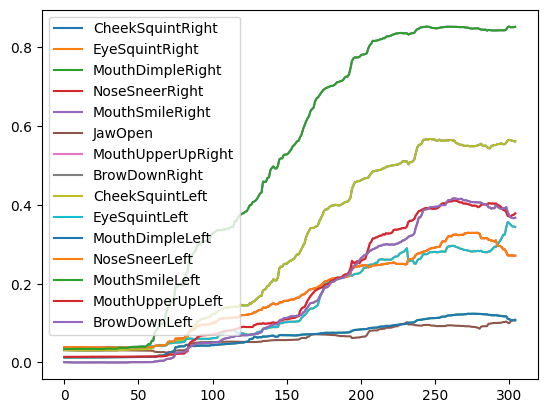

In [ ]:
mean.plot()

<Axes: >

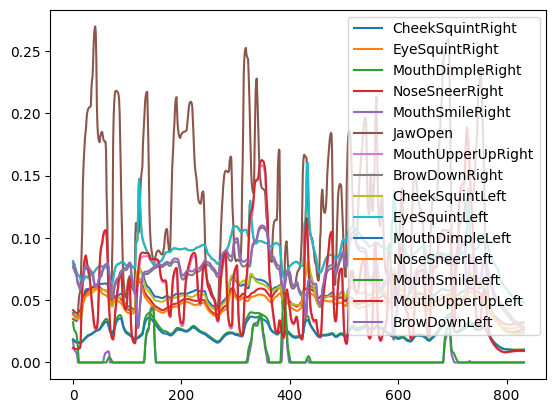

In [ ]:
neutral_happy = neutral.loc[:, mean.columns]
neutral_happy.plot()

<Axes: >

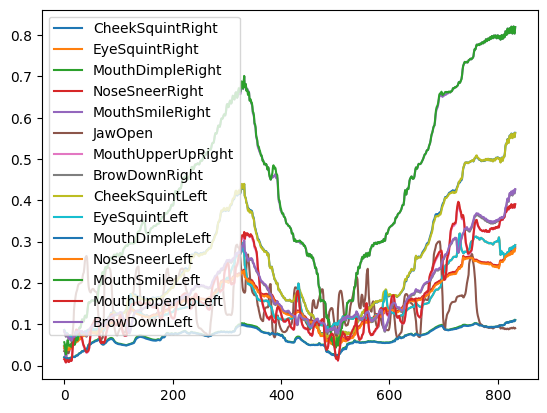

In [ ]:
amplified_happy = amplified_AMP.loc[:, mean.columns]
amplified_happy.plot()

<Axes: >

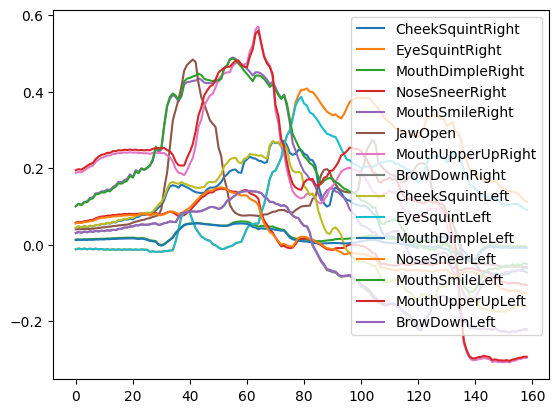

In [ ]:
dampened_happy = dampened_AMP.loc[:, mean.columns]
dampened_happy.plot()

<Axes: >

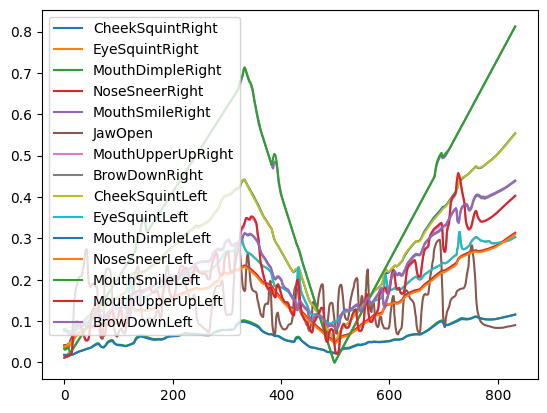

In [ ]:
amplified_happy_lin = amplified_LIN.loc[:, mean.columns]
amplified_happy_lin.plot()

<Axes: >

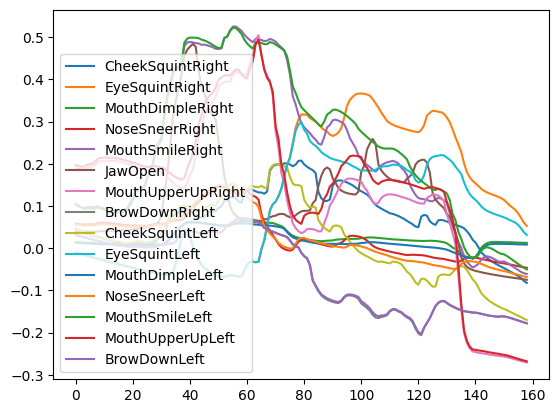

In [ ]:
dampened_happy_lin = dampened_LIN.loc[:, mean.columns]
dampened_happy_lin.plot()

In [ ]:
amplified_happy = amplified.loc[:, mean.columns]
amplified_happy.plot()

In [ ]:
mean["MouthSmileRight"]

0      0.034562
1      0.034562
2      0.034532
3      0.034323
4      0.034275
         ...   
300    0.852801
301    0.850504
302    0.851213
303    0.850940
304    0.851875
Name: MouthSmileRight, Length: 305, dtype: float64

In [ ]:
low = mean[column].iloc[0]
        high = mean[column].iloc[-1]
        resample = np.linspace(low, high, len(amplified))

In [ ]:
neutral["MouthSmileRight"]

0      0.223425
1      0.222540
2      0.221477
3      0.220815
4      0.220212
         ...   
153    0.120971
154    0.121670
155    0.122127
156    0.122378
157    0.122352
Name: MouthSmileRight, Length: 158, dtype: float64

In [ ]:
amplified_AMP["MouthSmileRight"]

0      0.294375
1      0.296496
2      0.302371
3      0.305455
4      0.313343
         ...   
153    1.806511
154    1.805969
155    1.817938
156    1.815690
157    1.827045
Name: MouthSmileRight, Length: 158, dtype: float64